In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


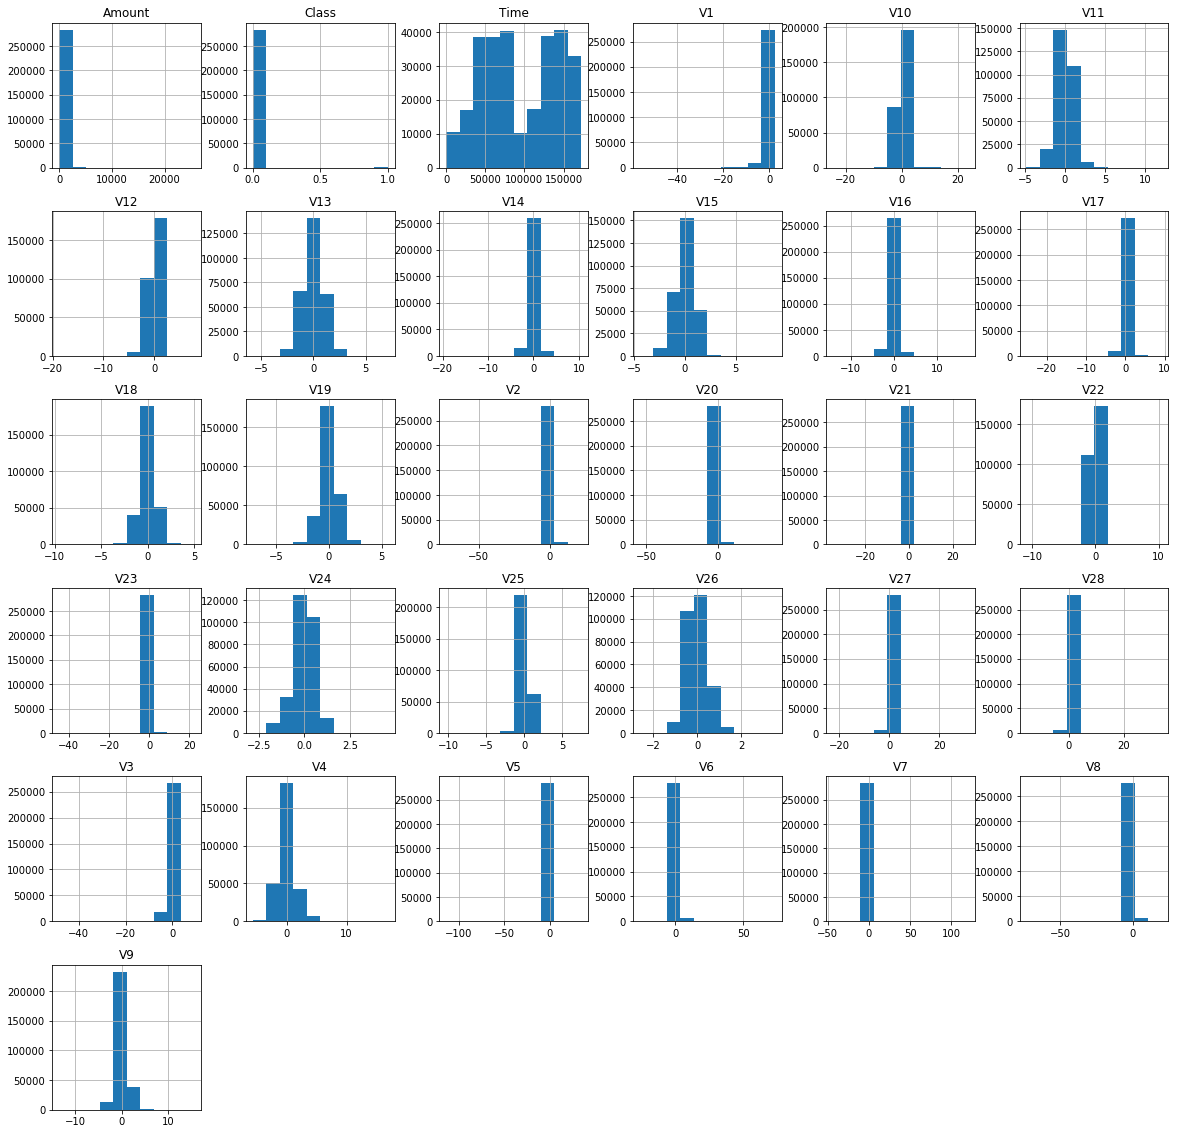

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize=(20, 20))
plt.show()

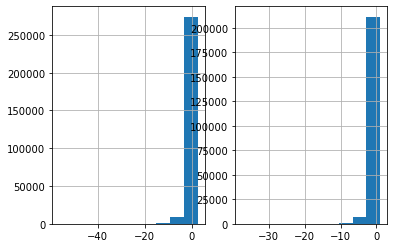

In [12]:
from scipy.special import boxcox1p

# Hist plot of data 
plt.subplot(121)
df['V1'].hist()

# Apply the Box-Cox transformation
df['boxcox_V1'] = boxcox1p(df['V1'], -0.2)

# Hist plot of the data transformation
plt.subplot(122)
df['boxcox_V1'].hist()
plt.show()

In [40]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [41]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [42]:
df.drop(['scaled_time'], axis=1, inplace=True)

# Feature distribution and remove outliers one by one

List of Features:
V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18

In [43]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# remove outliers
v1_fraud = df['V1'].loc[df['Class'] == 1].values
q25, q75 = np.percentile(v1_fraud, 25), np.percentile(v1_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v1_iqr = q75 - q25
print('iqr: {}'.format(v1_iqr))

v1_cut_off = v1_iqr * 1.5
v1_lower, v1_upper = q25 - v1_cut_off, q75 + v1_cut_off
print('Cut Off: {}'.format(v1_cut_off))
print('V1 Lower: {}'.format(v1_lower))
print('V1 Upper: {}'.format(v1_upper))

outliers = [x for x in v1_fraud if x < v1_lower or x > v1_upper]
print('Feature V1 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V1 outliers:{}'.format(outliers))

df1 = df.drop(df[(df['V1'] > v1_upper) | (df['V1'] < v1_lower)].index)
print('----' * 44)

Quartile 25: -6.03606299434868 | Quartile 75: -0.41920007625767897
iqr: 5.616862918091001
Cut Off: 8.4252943771365
V1 Lower: -14.461357371485182
V1 Upper: 8.006094300878821
Feature V1 Outliers for Fraud Cases: 52
V1 outliers:[-14.4744374924863, -15.3988450085358, -14.724627011925302, -15.2713618637585, -15.819178720771802, -16.3679230107968, -16.9174682656955, -17.4677100117887, -18.0185611876771, -15.903635202011301, -16.5986647432584, -17.2751911945397, -18.474867903441, -19.1798264145873, -19.856322333443302, -20.5327510764355, -21.2091195927913, -21.885433905174104, -22.5616992591298, -23.237920244511, -23.9141008948243, -24.590244769046503, -25.2663550194138, -25.9424344479142, -27.1436784229495, -27.84818067198, -28.524267593840605, -29.200328590574397, -29.876365513976303, -30.552380043581, -15.020980603078899, -14.9703456545046, -15.140449622507301, -16.5265065691231, -18.247513228667298, -19.1397328634111, -20.9069081014654, -26.4577446501446, -26.4577446501446, -26.4577446501

Text(0.5, 1.0, 'V1 New Distribution \n (Fraud Transactions)')

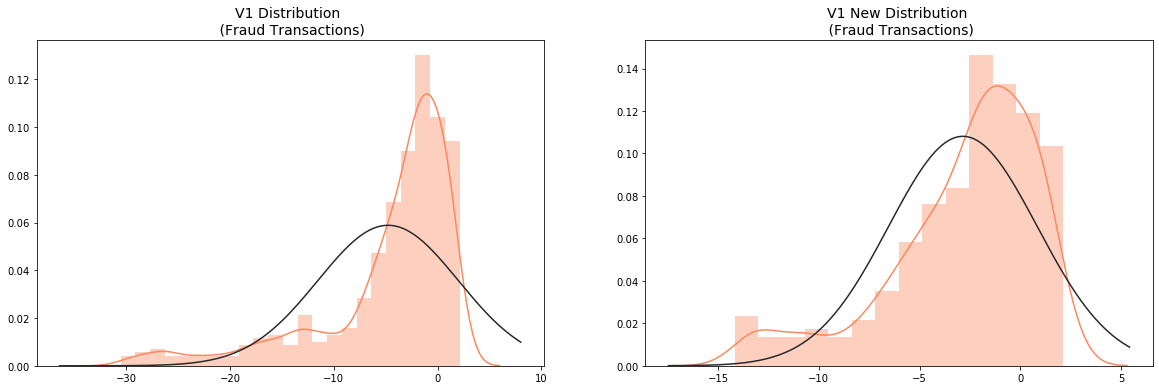

In [45]:
f, (ax1,ax_1) = plt.subplots(1,2, figsize=(20, 6))

v1_fraud_dist = df['V1'].loc[df['Class'] == 1].values
sns.distplot(v1_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V1 Distribution \n (Fraud Transactions)', fontsize=14)

v1_fraud_dist_new = df1['V1'].loc[df1['Class'] == 1].values
sns.distplot(v1_fraud_dist_new,ax=ax_1, fit=norm, color='#FB8861')
ax_1.set_title('V1 New Distribution \n (Fraud Transactions)', fontsize=14)

Text(0.5, 1.0, 'V1 Feature \n Reduction of outliers')

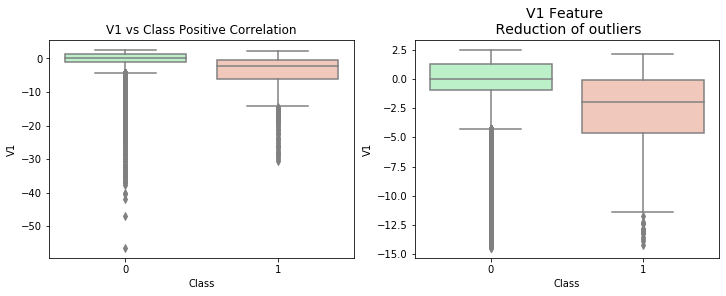

In [48]:
f, (ax1,ax_1) = plt.subplots(1,2, figsize=(12, 4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V1", data=df, palette=colors, ax=ax1)
ax1.set_title('V1 vs Class Positive Correlation')

# Boxplots with outliers removed
colors = ['#B3F9C5', '#f9c5b3']
sns.boxplot(x="Class", y="V1", data=df1,ax=ax_1, palette=colors)
ax_1.set_title("V1 Feature \n Reduction of outliers", fontsize=14)